<h1 style="text-align:center;">Titrage</h1>

#### Représenter, à l’aide d’un langage de programmation, l’évolution des quantités de matière des espèces en fonction du volume de solution titrante versé (terminale)

Comme pour le tableau d'avancement, nous allons travailler avec un pas dV petit devant le volume total versé. On limitera le volume versé à 25 mL, volume d'une burette graduée.

Le volume à l'équivalence $V_{eq}$ a été mesuré expérimentalement.

L'exemple choisi ici est le titrage directe du diiode $I_2$ par le thiosulfate $S_2O_3^{2-}$.


|     | $I_2$ |  +  | $2\ S_2O_3^{2-}$ | $\longrightarrow$ | $2\ I^-$ |  +  | $S_4O_6^{2-}$ |
|:---:|:-----:|:---:|:----------------:|:---:|:-------:|:---:|:------------:|
| EInit | $C_1 V_1$ |  |  $C_2 V_{versé}$ |  |  $0$  |   |  $0$  |
| EInter | $C_1 V_1 - x$ |  |  $C_2 V_{versé} - 2 x$ |  |  $2 x$ |   | $x$ |
| EF | $C_1  V_1 - x_f$  |  |  $C_2 V_{versé} - 2 x_f$ |  | $2 x_f$ |  |  $x_f$ |

$$ \ $$
Afin de déterminer $x_f$, il faut déterminer le réactif limitant. Le réactif limitant est celui pour lequel la quantité de matière à l'état final arrive à zéro en premier. L'avancement $x_f$ que l'on va utiliser est donc la valeur la plus petite entre $C_1 V_1$ et $\frac{C_2 V_{versé}}{2}$ ici.

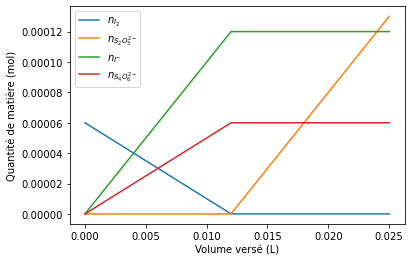

In [1]:
import matplotlib.pyplot as plt

# Données
V1 = 10e-3 # L
C2 = 1e-2 # mol/L

Veq = 12.0e-3 # L
C1 = C2*Veq / (2*V1)

V2 = [0] # On initialise avec un volume versé nul
dV = 1e-5 # L

# Premier point: Etat final avec Vversé = 0
n1 = [C1*V1] # I2
n2 = [0] # thiosulfate
n3 = [0] # I-
n4 = [0] # tetrathionate

while V2[-1] < 25e-3: # On limite à 25 mL
    V2.append(V2[-1] + dV)
    xf = min(C1*V1,0.5*C2*V2[-1]) # calcul de xf pour le V2 considéré
    n1.append(C1*V1-xf)
    n2.append(C2*V2[-1]-2*xf)
    n3.append(2*xf)
    n4.append(xf)
    

plt.plot(V2,n1,label=r"$n_{I_2}$")
plt.plot(V2,n2,label=r"$n_{S_2O_3^{2-}}$")
plt.plot(V2,n3,label=r"$n_{I^{-}}$")
plt.plot(V2,n4,label=r"$n_{S_4O_6^{2-}}$")
plt.legend()
plt.xlabel("Volume versé (L)")
plt.ylabel("Quantité de matière (mol)")
plt.show()

Une autre façon de voir les choses est de séparer le comportement en 2 cas, avant ou après équivalence. Le résultat est bien entendu le même.

$$ \ $$
<div style="text-align: center; font-weight: bold">Avant équivalence  </div>

|     | $I_2$ |  +  | $2\ S_2O_3^{2-}$ | $\longrightarrow$ | $2\ I^-$ |  +  | $S_4O_6^{2-}$ |
|:---:|:-----:|:---:|:----------------:| :---: | :-------: | :---: | :------------: |
| EInit | $C_1 V_1$ |  |  $C_2 V_{versé}$ |  |  $0$  |   |  $0$  |
| EInter | $C_1 V_1 - x$ |  |  $C_2 V_{versé} - 2 x$ |  |  $2 x$ |   | $x$ |
| EF | $C_1  V_1 - x_f = C_1 V_1 - \frac{ C_2 V_{versé}}{2}$  |  |  $C_2 V_{versé} - 2 x_f = 0$ |  | $2 x_f = C_2 V_{versé}$ |  |  $x_f = \frac{C_2 V_{versé}}{2} $ |

  
$$ \ $$
<div style="text-align: center; font-weight: bold">Après équivalence  </div>

|     | $I_2$ |  +  | $2\ S_2O_3^{2-}$ | $\longrightarrow$ | $2\ I^-$ |  +  | $S_4O_6^{2-}$ |
|:---:|:-----:|:---:|:----------------:|:---:|:-------:|:---:|:------------:|
| EInit | $C_1 V_1$ |  |  $C_2 V_{versé}$ |  |  $0$  |   |  $0$  |
| EInter | $C_1 V_1 - x$ |  |  $C_2 V_{versé} - 2 x$ |  |  $2 x$ |   | $x$ |
| EF | $C_1  V_1 - x_f = 0$  |  |  $C_2 V_{versé} - 2 x_f = C_2 V_{versé} - 2 C_1 V_1$ |  | $2 x_f = 2 C_1 V_1$ |  |  $x_f = C_1 V_1$ |


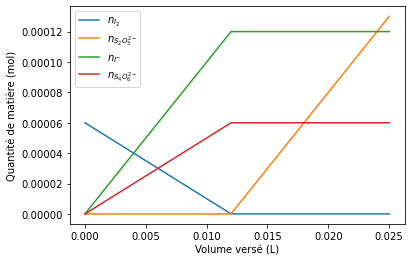

In [2]:
# Données
V1 = 10e-3 # L
C2 = 1e-2 # mol/L

Veq = 12.0e-3 # L

V2 = [0] # On initialise avec un volume versé nul
dV = 1e-5 # L

# Premier point: Etat final avec Vversé = 0
n1 = [C1*V1] # I2
n2 = [0] # thiosulfate
n3 = [0] # I-
n4 = [0] # tetrathionate

while V2[-1] < 25e-3:
    V2.append(V2[-1] + dV)
    if V2[-1] <= Veq: # Avant équivalence
        n1.append(C1*V1-0.5*C2*V2[-1])
        n2.append(0)
        n3.append(C2*V2[-1])
        n4.append(0.5*C2*V2[-1])
    else: # Après équivalence
        n1.append(0)
        n2.append(C2*V2[-1] - 2*C1*V1)
        n3.append(2*C1*V1)
        n4.append(C1*V1)
    

plt.plot(V2,n1,label=r"$n_{I_2}$")
plt.plot(V2,n2,label=r"$n_{S_2O_3^{2-}}$")
plt.plot(V2,n3,label=r"$n_{I^{-}}$")
plt.plot(V2,n4,label=r"$n_{S_4O_6^{2-}}$")

plt.legend()
plt.xlabel("Volume versé (L)")
plt.ylabel("Quantité de matière (mol)")
plt.show()